In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dir = "./data/"
credit = pd.read_csv(dir+"data4columbia_credit.csv")
credit.columns = ['company','date', 'data']
credit.date = pd.to_datetime(credit.date)
pivot_credit = pd.pivot_table(credit, values="data", index="date", columns="company")
pivot_credit = pivot_credit.fillna(0)

data = pivot_credit["dfe2fbf1ed01"]

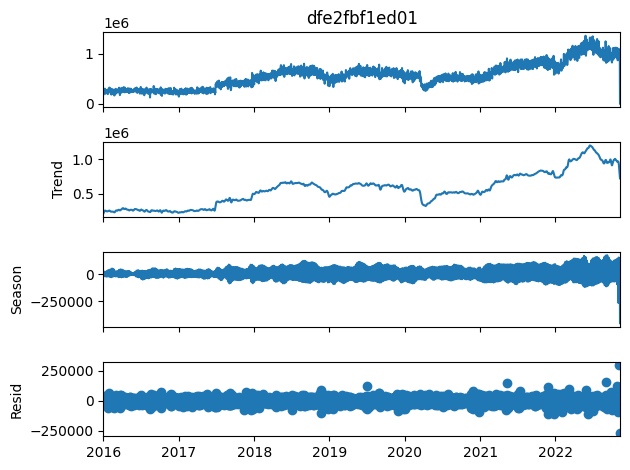

In [2]:
from statsmodels.tsa.seasonal import STL

stl = STL(data, seasonal=7)
res = stl.fit()
fig = res.plot()

In [3]:
data_concat = pd.concat([data, res.trend, res.seasonal, res.resid], axis=1)
data_concat = data_concat.rename(columns={"dfe2fbf1ed01":"company"})
data_concat = data_concat.reset_index()
data_concat

,date,company,trend,season,resid
0,2016-01-01,181501.8496,209497.190210,-121.699367,-27873.641243
1,2016-01-02,190782.1679,216539.860920,-6670.979772,-19086.713248
2,2016-01-03,231482.3076,223156.173200,-18823.208039,27149.342439
3,2016-01-04,246606.3886,229447.473875,4186.697809,12972.216916
4,2016-01-05,256720.4474,235475.051891,78.222545,21167.172963
...,...,...,...,...,...
2501,2022-11-06,891444.9990,871009.604803,-29928.324122,50363.718319
2502,2022-11-07,942398.3733,836242.652593,69248.080728,36907.639979
2503,2022-11-08,931085.5098,799967.513195,47147.521807,83970.474798
2504,2022-11-09,976707.1029,761988.693653,117756.032516,96962.376731


US Holidays

In [4]:
import pandas as pd
import holidays
import matplotlib.pyplot as plt

# Get US holidays for a specific year
year = [date for date in range(2016, 2023)]
us_holidays = holidays.US(years=year)

# Create a DataFrame with the desired structure
dates = pd.date_range(start='2016-01-01', end='2022-12-31', freq='D')
holidays_df = pd.DataFrame(index=dates, columns=['holiday'])

# Fill in the 'holiday' column with True for US federal holidays
for date, holiday in us_holidays.items():
    ts_date = pd.Timestamp(date)
    holidays_df.loc[ts_date, 'holiday'] = 1
    holidays_df.loc[ts_date - pd.DateOffset(days=1), 'holiday'] = 1
    holidays_df.loc[ts_date + pd.DateOffset(days=1), 'holiday'] = 1

# Fill in the remaining dates with False
holidays_df['holiday'] = holidays_df['holiday'].fillna(0)

holidays_df = holidays_df.reset_index()
holidays_df = holidays_df.rename(columns={"index":"date"})
holidays_df


,date,holiday
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
2553,2022-12-28,0
2554,2022-12-29,0
2555,2022-12-30,0
2556,2022-12-31,0


In [5]:
us_holidays

{datetime.date(2016, 1, 18): 'Martin Luther King Jr. Day', datetime.date(2016, 2, 15): "Washington's Birthday", datetime.date(2016, 10, 10): 'Columbus Day', datetime.date(2016, 1, 1): "New Year's Day", datetime.date(2016, 5, 30): 'Memorial Day', datetime.date(2016, 7, 4): 'Independence Day', datetime.date(2016, 9, 5): 'Labor Day', datetime.date(2016, 11, 11): 'Veterans Day', datetime.date(2016, 11, 24): 'Thanksgiving', datetime.date(2016, 12, 25): 'Christmas Day', datetime.date(2016, 12, 26): 'Christmas Day (Observed)', datetime.date(2017, 1, 16): 'Martin Luther King Jr. Day', datetime.date(2017, 2, 20): "Washington's Birthday", datetime.date(2017, 10, 9): 'Columbus Day', datetime.date(2017, 1, 1): "New Year's Day", datetime.date(2017, 1, 2): "New Year's Day (Observed)", datetime.date(2017, 5, 29): 'Memorial Day', datetime.date(2017, 7, 4): 'Independence Day', datetime.date(2017, 9, 4): 'Labor Day', datetime.date(2017, 11, 11): 'Veterans Day', datetime.date(2017, 11, 10): 'Veterans Day

US Sales Event

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a range of dates from 2016 to 2022
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2022-12-31')
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create an empty dataframe with the dates as the index
sales_df = pd.DataFrame(index=dates)

# Define the US sales days
us_sales_days = {
    'Black Friday': ['2016-11-25', '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25'],
    'Cyber Monday': ['2016-11-28', '2017-11-27', '2018-11-26', '2019-12-02', '2020-11-30', '2021-11-29', '2022-11-28'],
    'Amazon Prime Day': ['2016-07-12', '2017-07-11', '2018-07-16', '2019-07-15', '2020-10-13', '2021-06-21', '2022-07-11'],
    'Memorial Day': ['2016-05-30', '2017-05-29', '2018-05-28', '2019-05-27', '2020-05-25', '2021-05-31', '2022-05-30'],
    'Labor Day': ['2016-09-05', '2017-09-04', '2018-09-03', '2019-09-02', '2020-09-07', '2021-09-06', '2022-09-05'],
    'President\'s Day': ['2016-02-15', '2017-02-20', '2018-02-19', '2019-02-18', '2020-02-17', '2021-02-15', '2022-02-21'],
    'Fourth of July': ['2016-07-04', '2017-07-04', '2018-07-04', '2019-07-04', '2020-07-04', '2021-07-04', '2022-07-04'],
    'Super Saturday': ['2016-12-24', '2017-12-23', '2018-12-22', '2019-12-21', '2020-12-19', '2021-12-18', '2022-12-24'],
    'New Year\'s Day': ['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']
}

# Construct the DataFrame
for event, dates_list in us_sales_days.items():
    for date in dates_list:
        sales_df.loc[pd.to_datetime(date), 'sales'] = event
        sales_df.loc[pd.to_datetime(date) - pd.DateOffset(days=1), 'sales'] = event
        sales_df.loc[pd.to_datetime(date) + pd.DateOffset(days=1), 'sales'] = event

# Replace NaN values with 0
sales_df.fillna(0, inplace=True)

# Replace sales event names with 1
sales_df['sales'].replace(list(us_sales_days.keys()), 1, inplace=True)


sales_df = sales_df.reset_index()
sales_df = sales_df.rename(columns={"index":"date"})

sales_df


,date,sales
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
2553,2022-12-28,0
2554,2022-12-29,0
2555,2022-12-30,0
2556,2022-12-31,0


Putting all together

In [7]:
import functools as ft

dfs = [data_concat, holidays_df, sales_df]
dataset = ft.reduce(lambda left, right: pd.merge(left, right, on='date'), dfs)
dataset

,date,company,trend,season,resid,holiday,sales
0,2016-01-01,181501.8496,209497.190210,-121.699367,-27873.641243,1,1
1,2016-01-02,190782.1679,216539.860920,-6670.979772,-19086.713248,1,1
2,2016-01-03,231482.3076,223156.173200,-18823.208039,27149.342439,0,0
3,2016-01-04,246606.3886,229447.473875,4186.697809,12972.216916,0,0
4,2016-01-05,256720.4474,235475.051891,78.222545,21167.172963,0,0
...,...,...,...,...,...,...,...
2501,2022-11-06,891444.9990,871009.604803,-29928.324122,50363.718319,0,0
2502,2022-11-07,942398.3733,836242.652593,69248.080728,36907.639979,0,0
2503,2022-11-08,931085.5098,799967.513195,47147.521807,83970.474798,0,0
2504,2022-11-09,976707.1029,761988.693653,117756.032516,96962.376731,0,0


In [8]:
# Step 8: Fit a regression model
X = dataset[['holiday','sales']]
#X = sm.add_constant(X)  # Add a constant term
y = dataset['company']
model = sm.OLS(y, X)
result = model.fit()

In [9]:
parameter = result.params

In [10]:
y_pred = model.predict(parameter)
y_pred

array([642837.23825559, 642837.23825559,      0.        , ...,
            0.        ,      0.        , 381336.60519914])

In [11]:
import math
from sklearn.metrics import mean_squared_error

real_error = math.sqrt(mean_squared_error(y_pred, dataset["company"]))
print('Test rmse on normal scale: %.3f' % real_error)

Test rmse on normal scale: 584465.879


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                company   R-squared (uncentered):                   0.074
Model:                            OLS   Adj. R-squared (uncentered):              0.073
Method:                 Least Squares   F-statistic:                              99.64
Date:                Sun, 23 Jul 2023   Prob (F-statistic):                    2.31e-42
Time:                        16:57:05   Log-Likelihood:                         -36832.
No. Observations:                2506   AIC:                                  7.367e+04
Df Residuals:                    2504   BIC:                                  7.368e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday     3.813e+05   5.05e+04      7.545      0.000    2.82e+05     4.8e+05
sales       2.615e+05   5.56e+04      4.699      0.000    1.52e+05    3.71e+05
==============================================================================
Omnibus:                       52.148   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.487
Skew:                          -0.226   Prob(JB):                     4.06e-17
Kurtosis:                       3.720   Cond. No.                         2.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
import numpy as np
from scipy import signal

# Assuming you have a numpy array named 'data' containing the time series data
# Set the desired cut-off frequency (adjust as needed)
cutoff = 0.1

# Calculate the length of the filter window
window_length = int(np.ceil((4 / cutoff)))

# Normalize the window length to an odd number
if window_length % 2 == 0:
    window_length += 1

# Apply the Wiener-Kolmogorov filter
filtered_data = signal.lfilter([1.0], [1.0, cutoff], dataset["company"])

# Note: The WK filter assumes zero padding for the ends of the signal.
#       If you want to eliminate the padding, you can remove the first and last (window_length // 2) values from the filtered data.


In [14]:
filtered_data

array([181501.8496    , 172631.98294   , 214219.109306  , ...,
       844907.82452392, 892216.32044761, -89221.63204476])

In [15]:
dataset["add_columns"] = dataset["trend"] + dataset["season"] + dataset["resid"]
dataset["WK_filter"] = filtered_data
dataset["check_wk_filter"] = dataset["WK_filter"] + dataset["resid"]
dataset

,date,company,trend,season,resid,holiday,sales,add_columns,WK_filter,check_wk_filter
0,2016-01-01,181501.8496,209497.190210,-121.699367,-27873.641243,1,1,181501.8496,181501.849600,153628.208357
1,2016-01-02,190782.1679,216539.860920,-6670.979772,-19086.713248,1,1,190782.1679,172631.982940,153545.269692
2,2016-01-03,231482.3076,223156.173200,-18823.208039,27149.342439,0,0,231482.3076,214219.109306,241368.451745
3,2016-01-04,246606.3886,229447.473875,4186.697809,12972.216916,0,0,246606.3886,225184.477669,238156.694585
4,2016-01-05,256720.4474,235475.051891,78.222545,21167.172963,0,0,256720.4474,234201.999633,255369.172596
...,...,...,...,...,...,...,...,...,...,...
2501,2022-11-06,891444.9990,871009.604803,-29928.324122,50363.718319,0,0,891444.9990,806215.205392,856578.923711
2502,2022-11-07,942398.3733,836242.652593,69248.080728,36907.639979,0,0,942398.3733,861776.852761,898684.492740
2503,2022-11-08,931085.5098,799967.513195,47147.521807,83970.474798,0,0,931085.5098,844907.824524,928878.299322
2504,2022-11-09,976707.1029,761988.693653,117756.032516,96962.376731,0,0,976707.1029,892216.320448,989178.697178


In [16]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [17]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1
